In [1]:
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import platform
import warnings
warnings.filterwarnings('ignore')

# ENTER CSV INFORMATION BELOW

In [2]:
## Paths Input Here
analysis = "basic_analysis/atrophy_to_clinical_variables"
if platform.uname().system == 'Darwin': #------------------------------Mac OS X---------------------------------------------------------------
    conn_path = r'/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/grey_matter_z_score_and_outcomes/grey_matter_z_scores_and_outcomes.csv'
    clin_path = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/patient_data/AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = os.path.join(os.path.dirname(conn_path), f'{analysis}')
    #out_dir = r'path to out dir here'
    x_roi_names = r'/Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/rios_ferguson_yeo_and_conjunction_cluster_roi_roi_correlation/matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Mac style')
else: #----------------------------------------------------------------Windows----------------------------------------------------------------
    conn_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_AvgR.csv'
    clin_path = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\patient_data\AD_Clinical_Data_CDR_ADAS_COG_13.xlsx'
    # clin_path = 'path to clinical values'
    out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\AD_to_memory_net'
    #out_dir = r'path to out dir here'
    x_roi_names = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\roi-roi_correl\matrix_corrMx_names.csv'
    #roi_names = '<path to roi name location>'
    print('I have set pathnames in the Windows style')

if os.path.isdir(out_dir) != True:
    os.makedirs(out_dir)
print('I will save to:', out_dir)
save = True
do_transform = False

I have set pathnames in the Mac style
I will save to: /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/grey_matter_z_score_and_outcomes/basic_analysis/atrophy_to_clinical_variables


## Import Pre-Prepared DF

In [3]:
variables_to_change = {}
variables_to_change['original'] = [
    'percent_change_adascog11'
  
    ]
variables_to_change['destination'] = [
    '% Improvement (ADAS-Cog11)'
    
    ]
#----------------------------------------------------------------user input above----------------------------------------------------------------
data_df = pd.read_csv(conn_path)
# try:
#     data_df = data_df.set_index('Unnamed: 0')
# except:
#     print('Could not find ("Unnamed: 0") ')
#Rename variables to prevent errors
## Set a list of the variables to be fed into DF
change_string = ''
try:
    for i in range (0, len(variables_to_change['original'])):
        change_string += f"variables_to_change['original'][{i}]: variables_to_change['destination'][{i}],"
    change_string = 'data_df.rename(columns={' + change_string[0:-1] + '})'
    data_df = eval(change_string)
except:
    print('Could not change name of input string')
#Organize the columns
# import natsort
# natsorted_columns = natsort.natsorted(data_df.columns)
# data_df = data_df.reindex(columns=natsorted_columns)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/quantitative_atrophy/grey_matter_z_score_and_outcomes/grey_matter_z_scores_and_outcomes.csv'

In [ ]:
#place response column at start of dataframe
# response_series = data_df.pop(variables_to_change['destination'][0])
# data_df.insert(0, variables_to_change['destination'][0], response_series)

#Remove outlier
outlier_index=[11, 47, 48, 49]
data_df = data_df.drop(index=outlier_index)

#Handle NaNs
#Drop NANs
# data_df.dropna(inplace=True)

#One Hot Encode
# data_df.loc[:, 'Randomization Arm'] 

display(data_df)

,subject_id,Age,% Change from baseline (ADAS-Cog11),Subiculum Connectivity,Subiculum,Hippocampus,Cerebellum,Frontal,Insula,Parietal,Temporal,Occipital
0,101,62,-21.428571,56.864683,1.580284,-0.312489,1.292918,0.996701,1.095077,-0.761368,-1.023191,-1.147482
1,102,77,-36.363636,52.970984,-0.572935,-3.682041,-1.521224,-1.100899,-1.833263,-1.443009,-2.856390,-1.845638
2,103,76,-78.947368,62.459631,0.340495,-1.947076,-0.847638,-0.888490,-0.939795,-0.311940,-1.347207,0.179233
3,104,65,-129.411765,59.611631,-0.152795,-1.948027,-0.427482,-0.574506,-1.460534,-1.538464,-2.564422,-0.906022
4,105,50,-10.526316,57.928350,0.019763,-0.193082,0.129338,-1.272936,-0.729429,-1.830548,-1.191519,-0.060613
5,106,66,-38.461538,63.323903,1.214537,-1.645625,1.125382,1.900326,0.436291,0.248385,0.303345,-0.281681
6,107,64,-15.384615,53.317851,-1.773336,-3.213928,-0.248600,-1.550670,-1.486026,-2.960023,-2.470454,-2.651427
7,108,60,-29.166667,57.979468,-0.169675,-1.996234,-1.014240,0.917604,0.709484,-0.901767,-2.376989,-1.086743
8,109,72,-30.434783,66.950749,-0.136852,-2.212054,0.840584,0.885750,0.194786,-0.436917,-2.262198,-1.086917
9,110,72,-84.615385,69.267271,1.232355,-1.089821,0.609569,-0.957503,-2.008646,-0.736899,-1.170486,0.752478


In [ ]:
print(data_df.columns)

Index(['subject_id', 'Age', '% Change from baseline (ADAS-Cog11)',
       'Subiculum Connectivity', 'Subiculum', 'Hippocampus', 'Cerebellum',
       'Frontal', 'Insula', 'Parietal', 'Temporal', 'Occipital'],
      dtype='object')


In [32]:
x = data_df.pop('Hippocampus')
data_df['Hippocampal Mean Grey Matter'] = x

## Generate Overall Linear Model Plot

In [42]:
dependent_variable = 'Age'
independent_variable = ['Hippocampal Mean Grey Matter']
what_are_the_independent_variables = 'Z-Score'
independent_measurement_name = 'Correlation'
#Stratify by variable
# index = popped_df['Age at DOS'] > 65
# popped_df = popped_df[index]

print(independent_variable)


['Hippocampal Mean Grey Matter']


In [43]:
from natsort import natsorted
from natsort import index_natsorted

##----------------------------------------------------------------User Input Above
popped_df = data_df.copy()
popped_df = popped_df.loc[:, independent_variable.__add__([dependent_variable])]

# assuming df is a pandas DataFrame and order is a list of column names
order = natsorted(popped_df.columns)

# reorganize the columns of df based on the order of column names
df_organized = popped_df.reindex(columns=order)

#Melt the data frame
melted_df = pd.melt(popped_df, 
                    id_vars=dependent_variable, value_vars=independent_variable,
                    var_name=what_are_the_independent_variables, value_name=independent_measurement_name
                    );
# sort the DataFrame by the Connectivity Region column
melted_df = melted_df.sort_values(by=what_are_the_independent_variables, key=lambda x: np.argsort(index_natsorted(melted_df[what_are_the_independent_variables])))
display(melted_df)


,Age,Z-Score,Correlation
0,62,Hippocampal Mean Grey Matter,-0.312489
1,77,Hippocampal Mean Grey Matter,-3.682041
2,76,Hippocampal Mean Grey Matter,-1.947076
3,65,Hippocampal Mean Grey Matter,-1.948027
4,50,Hippocampal Mean Grey Matter,-0.193082
5,66,Hippocampal Mean Grey Matter,-1.645625
6,64,Hippocampal Mean Grey Matter,-3.213928
7,60,Hippocampal Mean Grey Matter,-1.996234
8,72,Hippocampal Mean Grey Matter,-2.212054
9,72,Hippocampal Mean Grey Matter,-1.089821


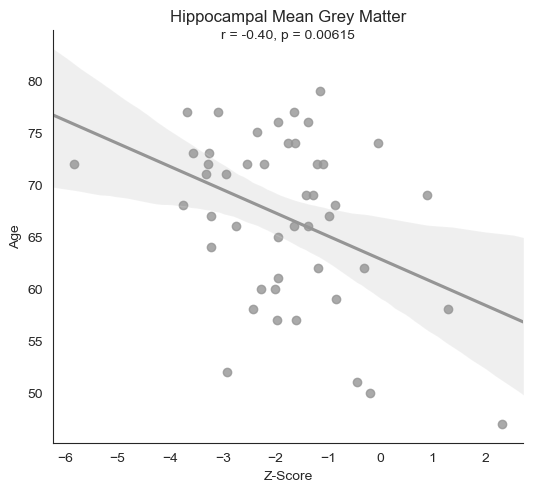

In [44]:
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

num_columns=4
###----------------------------------------------------------------
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)
facet_plot = sns.lmplot(y=dependent_variable, x=independent_measurement_name, data=melted_df,
           col=what_are_the_independent_variables,
           truncate=False, col_wrap=num_columns,
           facet_kws=dict(sharex=False, sharey=True)) #sharex and sharey disallows axis from ranging across subplots. Good for visualizaiton. 

#Calculate pearsonr for each cluster of Connection Regions
grouped_df = melted_df.groupby(what_are_the_independent_variables)
result = grouped_df.apply(lambda x: pearsonr(x[independent_measurement_name], x[dependent_variable]))


#Organize the outputs of the pearson to match the facet plot
rearranged_results = []
for region in melted_df[what_are_the_independent_variables].unique():
    rearranged_results.append(result[region])
result = rearranged_results
    
for i, ax in enumerate(facet_plot.axes):
    r, p = result[i]
    region = melted_df[what_are_the_independent_variables].unique()[i]
    title = f"{region}"
    ax.set_title(title)
    ax.annotate(f"r = {r:.2f}, p = {p:.5f}", xy=(.5, 1.0), xycoords='axes fraction',
            xytext=(0, 0), textcoords='offset points',
            ha='center', va='top',
            bbox=dict(boxstyle='round,pad=0.0', alpha=0.0),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
facet_plot.set_xlabels(what_are_the_independent_variables)


In [36]:
#Save the Elbow Plot Above
if save:
    save_dirsvg = os.path.join(out_dir, 'sham_first_linear_model_facet_plot.svg')
    save_dirpng = os.path.join(out_dir, 'sham_first_linear_model_facet_plot.png')
    facet_plot.savefig(save_dirsvg)
    facet_plot.savefig(save_dirpng)
    print(f'Fig saved to ', save_dirpng)

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/resources/datasets/BIDS_AD_DBS_FORNIX/clinical_data/derivative_metadata/qualitative_atrophy/basic_analysis/atrophy_to_outcome/sham_first_linear_model_facet_plot.png


## Assess overall dsitributions

<Figure size 2000x700 with 0 Axes>

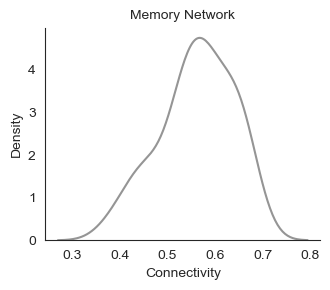

In [ ]:
#View distributions
import seaborn as sns
from scipy.stats import pearsonr
plt.figure(figsize=(20,7))
sns.set_style('white')
sns.set_palette('Greys', 1, desat=1)
facet_grid = sns.FacetGrid(data=melted_df, col='Connection Region',
                           col_wrap=5, sharex=False, sharey=False);
facet_grid.set_titles(col_template="{col_name}")
facet_grid.map(sns.kdeplot,'Connectivity');
# sns.kdeplot(data=melted_df, x='Connectivity', col='Connection Region')

In [ ]:
#Save the Elbow Plot Above
if save:
    save_dir = os.path.join(out_dir, 'kde_plot_facet_plot.png')
    facet_plot.savefig(save_dir)
    print(f'Fig saved to ', save_dir)

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/final_analyses/basic_analysis/memnet/kde_plot_facet_plot.png


# Analyze an Individual Variable

In [ ]:
print(data_df.columns.values.tolist())

['% Improvement (ADAS-Cog11)', 'Unnamed: 0', 'Randomization Arm', 'Patient # CDR, ADAS', 'Age at DOS', 'Baseline ADAS-Cog11', 'Baseline CDR (sum of squares)', '% Change from baseline (CDR)', 'ADAS Cog-11 Map', 'ADAS Cog-11 ROI', 'ADAS Cog-11 ROI Map']


In [ ]:
#Use Above to Determine Calculation Method
ycolumn_of_interest = '% Improvement (ADAS-Cog11)'
y_vals = data_df[ycolumn_of_interest].values.tolist()
# y_vals = data_df.iloc[:, 0].tolist()

xcolumn_of_interest = 'Maxima'
x_vals = data_df[xcolumn_of_interest].values.tolist()
# x_vals = data_df.iloc[:, 1].tolist()


print('No. datapoints in y_vals: ', len(y_vals))
print(y_vals)

print('No. datapoints in x_vals: ', len(x_vals))
print(x_vals)
# print(x_vals)

No. datapoints in y_vals:  50
[-21.42857143, -36.36363636, -78.94736842, -129.4117647, -10.52631579, -38.46153846, -15.38461538, -29.16666667, -30.43478261, -84.61538462, 41.66666667, 9.333333333, -60.0, -16.12903226, -48.27586207, -36.84210526, -3.125, -81.25, -27.77777778, -4.347826087, -140.0, 54.54545455, -18.75, -37.5, -100.0, -76.47058824, -20.83333333, -35.71428571, -7.142857143, -40.0, 6.25, 29.41176471, -45.71428571, -77.27272727, -9.523809524, -105.8823529, 18.18181818, 0.0, 5.555555556, 6.25, -61.53846154, 5.555555556, -54.54545455, -4.761904762, -207.6923077, -90.0, 13.63636364, -7.142857143, -2.255639098, -73.33333333]
No. datapoints in x_vals:  50
[-70.5607672, -60.75109563, -66.13550274, -72.29303065, -39.72891662, -71.29501504, -50.61992638, -41.17825148, -54.77484033, -58.80073931, -56.26137339, -50.83531751, -67.9098056, -64.50346925, -29.88019314, -65.83703016, -17.6776819, -59.88055741, -61.93946405, -42.74793196, -50.24585351, -55.38957681, -72.32283826, -45.850982

## Transform Data if Needed

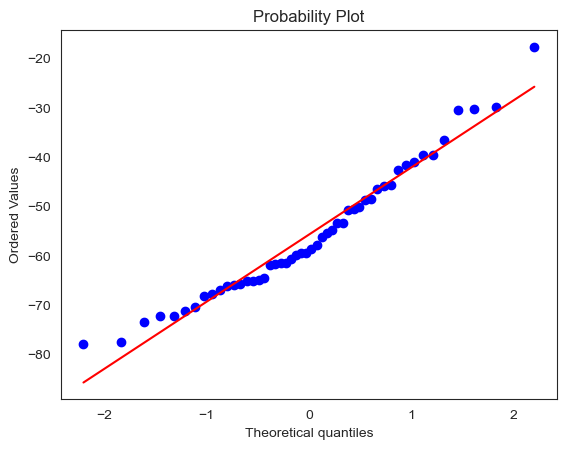

In [ ]:
#Visualize Q-Q Plots
import scipy.stats as stats
stats.probplot(x_vals, plot=plt);

In [ ]:
#Define Transformations
import seaborn as sns
import scipy.stats as stats
#function to return plots for the feature
def normality_plot(data, transform_function=None):
    sns.set_style('white')
    if transform_function is not None:
        data = eval(transform_function)
    
    fig = plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data)
    plt.subplot(1,2,2)
    stats.probplot(data, plot=plt)
    plt.show()
    return data, fig

def linear_transform(data):
    transformed = data
    return transformed

def natlog_transform(data):
    transformed=np.log(data)
    return transformed

def reciprocal_transform(data):
    transformed = np.divide(1,data)
    return transformed

def root_transform(data):
    transformed = np.sqrt(data)
    return transformed

def exponential_transform(data, exponent=2):
    transformed = np.power(data, exponent)
    return transformed

def boxcox_transform(data):
    transformed = stats.boxcox(data)
    return transformed

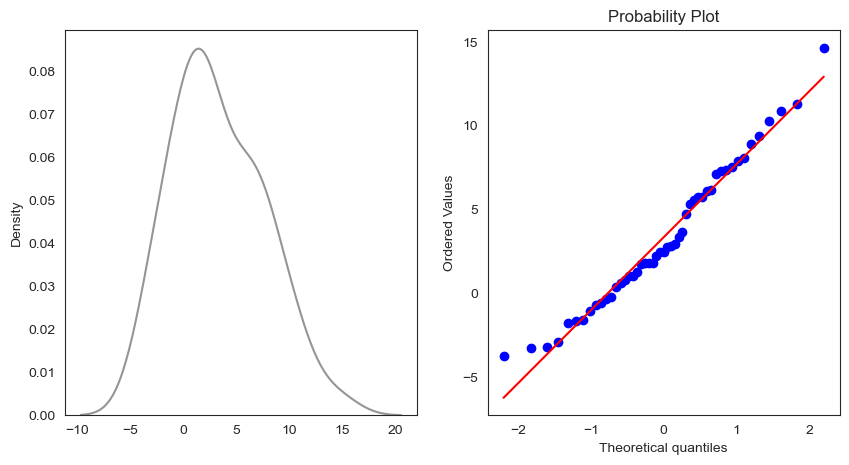

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/addbs_vta_to_memory_net_maxima/composite_memnet_maxima_analysis


In [ ]:
## --- transforms = linear_transform, natlog_transform, reciprocal_transform, root_transform, exponential_transform, boxcox_transform
transform = 'linear_transform' #'#'boxcox_transform'
transformed_data, transform_fig = normality_plot(x_vals, f'{transform}({x_vals})')
if save:
    transform_fig.savefig(os.path.join(out_dir, f'transformed_data_{transform}_{xcolumn_of_interest}.png'))
    print(f'Fig saved to ', out_dir)

In [ ]:
#Turn transformed data into x_vals
if do_transform: 
    try:
        x_vals = transformed_data.tolist()
        x_vals = np.nan_to_num(x_vals, nan=1, posinf=1, neginf=1) #np.replace(np.nan, np.mean(x_vals))
        mean = np.mean(x_vals)
        x_vals[x_vals == 1] = mean
        print(len(x_vals))
        print(x_vals)
    except:
        print()

## Calculate Pearson Correlation Coefficient

In [ ]:
from scipy.stats import pearsonr
x=x_vals
y=y_vals
r, p = pearsonr(x, y)


#Creating regression line
m, b = np.polyfit(x,y,1)
plotline = []
for a in range(0,len(x_vals)):
    plotline.append(x_vals[a]*m+b)

arb = np.polyfit(x,y,1)
p1 = np.poly1d(arb)
fit1 = np.polyval(arb, x); res1 = np.sum((y-fit1)**2)

arb = np.polyfit(x,y,2)
p2 = np.poly1d(arb)
fit2 = np.polyval(arb, x); res2 = np.sum((y-fit2)**2)

arb = np.polyfit(x,y,3)
p3 = np.poly1d(arb)
fit3 = np.polyval(arb, x); res3 = np.sum((y-fit3)**2)

arb = np.polyfit(x,y,4)
p4 = np.poly1d(arb)
fit4 = np.polyval(arb, x); res4 = np.sum((y-fit4)**2)

arb = np.polyfit(x,y,5)
p5 = np.poly1d(arb)
fit5 = np.polyval(arb, x); res5 = np.sum((y-fit5)**2)


In [ ]:
#calculate spearman's rho
from scipy.stats import spearmanr
correlation_dict = {}
pearson_results = pearsonr(x, y)
correlation_dict['pearson_r'] = pearson_results[0]
correlation_dict['pearson_p'] = pearson_results[1]
spearman_results = spearmanr(x, y)
correlation_dict['spearman_r'] = spearman_results[0]
correlation_dict['spearman_p'] = spearman_results[1]

print(pearson_results)
print(spearman_results)
correlation_df = pd.DataFrame(correlation_dict, index=['results'])
display(correlation_df)

if save:
    correlation_df.to_csv(os.path.join(out_dir, f'correlation_results_{xcolumn_of_interest}_{transform}.csv'))

PearsonRResult(statistic=0.31061616140772774, pvalue=0.02983842687617675)
SpearmanrResult(correlation=0.31068704328566815, pvalue=0.02979911261968707)


,pearson_r,pearson_p,spearman_r,spearman_p
results,0.310616,0.029838,0.310687,0.029799


## Plot the values

Text(0, 0.5, 'Least squares error')

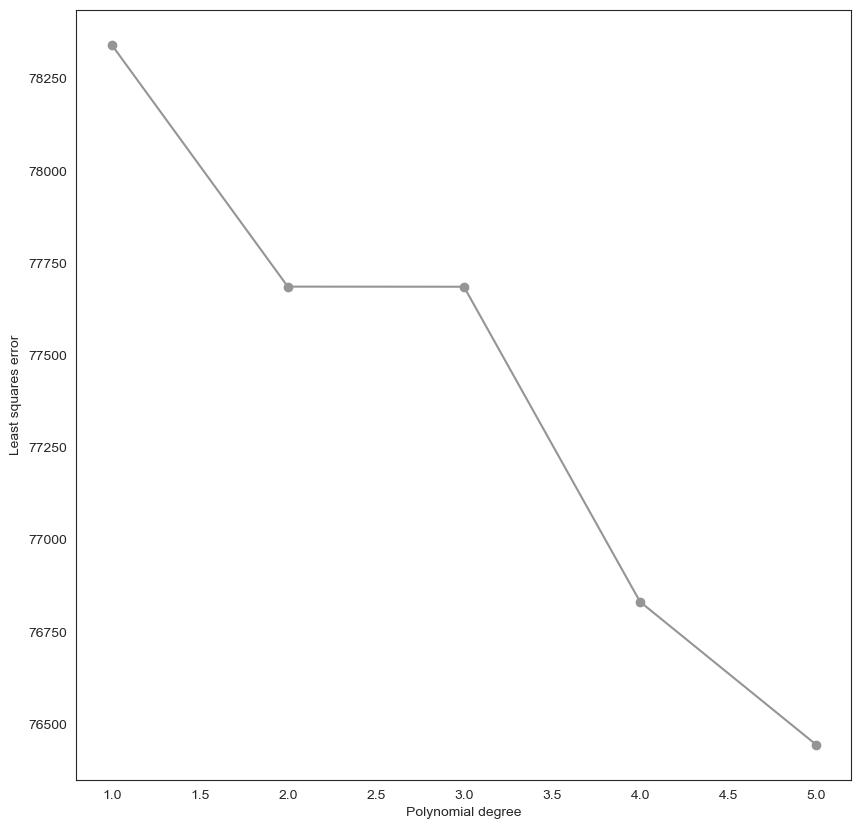

In [ ]:
#Plot the LOBF Least Squares Distribution
resids = [res1, res2, res3, res4, res5]
xres = range(0+1, len(resids)+1)
figure_res = plt.figure(figsize = (10,10))
plt.plot(xres, resids, 'o-')
plt.xlabel('Polynomial degree')
plt.ylabel('Least squares error')

In [ ]:
#Save the Elbow Plot Above
save_dir = os.path.join(out_dir, analysis) + f'{xcolumn_of_interest}_{transform}polynomial_elbow_plot.png'
figure_res.savefig(save_dir)
print(f'Fig {figure_res} \n saved to ', save_dir)

Fig Figure(1000x1000) 
 saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/addbs_vta_to_memory_net_maxima/composite_memnet_maxima_analysis/composite_memnet_maxima_analysisR. Sup. Front._linear_transformpolynomial_elbow_plot.png


Text(0.5, 1.0, 'Pearson: 0.31061616140772774 & p value: 0.02983842687617675')

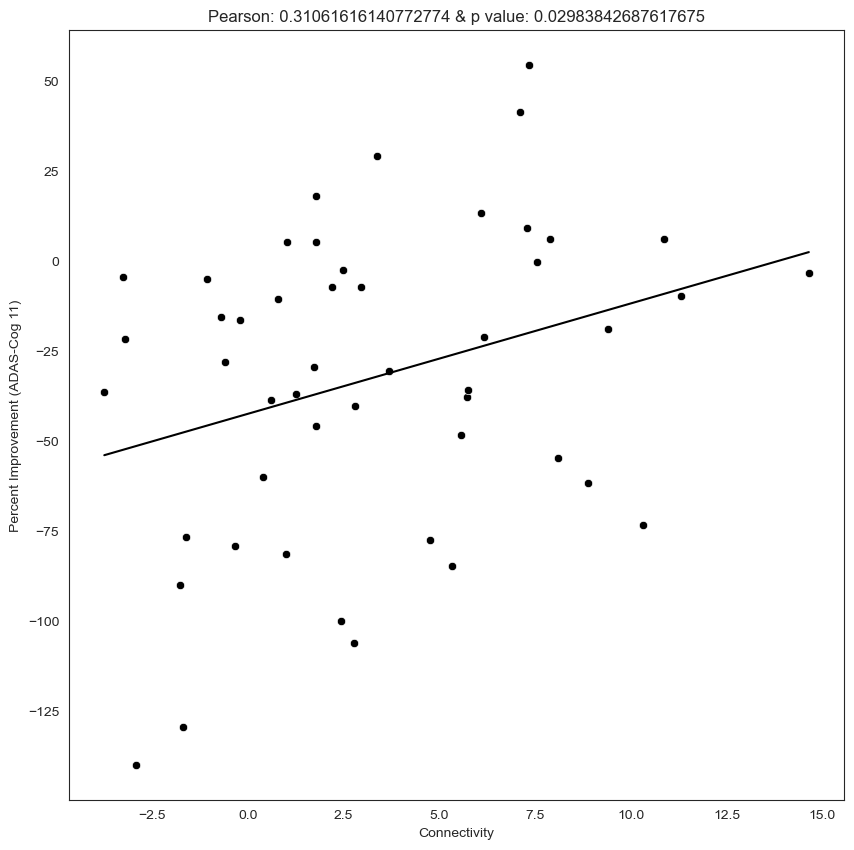

In [ ]:
import seaborn as sns
plt.style.use('grayscale')
sns.set_style('white')
figure = plt.figure(figsize = (10,10))

#plot the datapoints
sns.scatterplot(x=x, y=y) 

#Plot regresison line
smooth = np.linspace(np.min(x), np.max(x), 100)
plt.plot(smooth, p1(smooth), '-')#, smooth, p2(smooth), '-', smooth, p3(smooth), '-', smooth, p4(smooth), '-', smooth, p5(smooth), '-')
# plt.legend([1, 2, 3, 4, 5])

plt.xlabel('Connectivity')
plt.ylabel('Percent Improvement (ADAS-Cog 11)')
plt.title('Pearson: ' + str(r) + ' & p value: ' + str(p))

## Save Figure if Desired

In [ ]:
save_dir = os.path.join(out_dir, analysis) + f'{xcolumn_of_interest}_{transform}_linear_fit.png'
figure.savefig(save_dir)
print('Fig saved to ', save_dir)

Fig saved to  /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/composite_analyses/adas_cog11_derivatives/comparison_across_adascog11_derivates_outlier_removed/comparison_across_adascog11_derivates_outlier_removedADAS Cog-11 ROI Map_linear_transform_linear_fit.png


# Perform Secondary Analysis Stratifying By Third Variable

In [ ]:
# Prepare Third Variable
#User Input Below -- What dataframe has your third variable?
metric = 'Age at DOS' #-- What column has your third variable?
metric_val = 65


In [ ]:
z_vals = data_df[metric].values.tolist()
print('No. datapoints in z_vals: ', len(z_vals))
print(z_vals)

No. datapoints in z_vals:  37
[62, 77, 76, 65, 66, 72, 72, 69, 67, 67, 52, 75, 72, 47, 61, 73, 69, 74, 72, 69, 66, 68, 66, 57, 57, 72, 58, 73, 72, 77, 71, 79, 74, 76, 59, 77, 71]


In [ ]:
#Manipute z vals

over_65_x = []
over_65_y = []
under_65_x = []
under_65_y = []
#THE BELOW LOOP WILL CREATE NEW DATASETS DETERMINED BY THE Z VALUE: AGE. 
for i in range(0, len(z_vals)):
    if z_vals[i] > metric_val:
        over_65_x.append(x_vals[i])
        over_65_y.append(y_vals[i])
    elif z_vals[i] <= metric_val:
        under_65_x.append(x_vals[i])
        under_65_y.append(y_vals[i])
    else:
        print('Some error occured')
print('Len >65: ', len(over_65_x))
print('Len <=65: ', len(under_65_x))

Len >65:  28
Len <=65:  9


In [ ]:
#Correlations on new lists
r_over_65, p_over_65 = pearsonr(over_65_x, over_65_y)
print('Over 65 \n r: ', r_over_65, ' | p: ', p_over_65)
r_under_65, p_under_65 = pearsonr(under_65_x, under_65_y)
print('Under 65 \n r: ', r_under_65, ' | p: ', p_under_65)

#Line of Best Fit on New Lists
m_over, b_over = np.polyfit(over_65_x,over_65_y,1)
over_plotline = []
for a in range(0,len(over_65_x)):
    over_plotline.append(over_65_x[a]*m_over+b_over)

m_under, b_under = np.polyfit(under_65_x,under_65_y,1)
under_plotline = []
for a in range(0,len(under_65_x)):
    under_plotline.append(under_65_x[a]*m_under+b_under)


Over 65 
 r:  -0.1051033563586381  | p:  0.5945345373861903
Under 65 
 r:  0.11700172837864027  | p:  0.7643484164053818


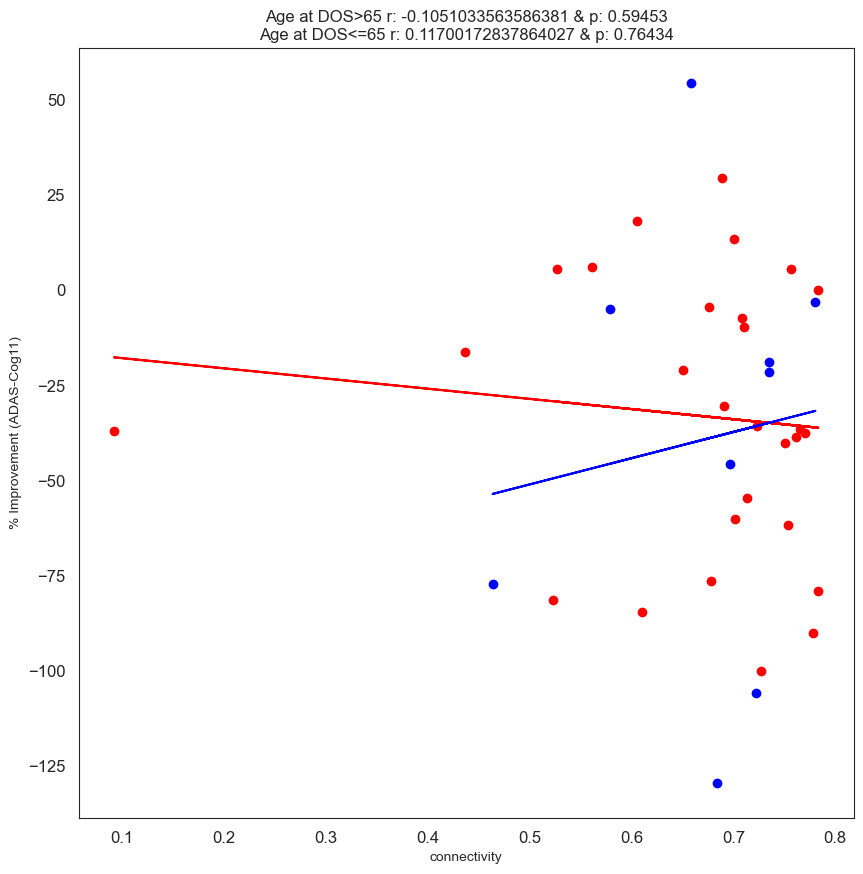

In [ ]:
#Plot the new data
figure2 = plt.figure(figsize = (10,10))
x_label = 'connectivity'
plt.xlabel(x_label)
plt.ylabel('% Improvement (ADAS-Cog11)')
plt.tick_params(labelsize=12, pad=6)

plt.title(f'{metric}>{metric_val} r: {r_over_65} & p: ' + str(p_over_65)[0:7] + '\n' + 
            f'{metric}<={metric_val} r: ' +str(r_under_65) + ' & p: ' +str(p_under_65)[0:7])

#Plot Over 65s
plt.scatter(over_65_x, over_65_y, c='red')
plt.plot(over_65_x, over_plotline, color='red')
#Plot Under 65s
plt.scatter(under_65_x, under_65_y, c='blue')
plt.plot(under_65_x, under_plotline, color='blue')


In [ ]:
out_dir2 = os.path.join(out_dir, 'by_age')
if os.path.isdir(out_dir2)==False:
    os.mkdir(out_dir2)
save_dir2 = os.path.join(out_dir2, analysis) + '_split_by_outcome_outlier_removed.png'
figure2.savefig(save_dir2)

print(f'saved to {out_dir2}')

saved to /Users/cu135/Dropbox (Partners HealthCare)/memory/analyses/roi-roi_correl/yeo_rois/comparison_across_yeo_rois_manually_gathered_outlier_out/by_age
